In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\ANIL CHOUDHARY\Desktop\pw skill\EDA_1\BIKE DETAILS.csv")
# Display the first few rows of the DataFrame
print(df.head())
df.head() #will show here 5 rows of the DataFrame

                                  name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                Yamaha SZ [2013-2014]          20000  2011  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000           148114.0  
3  1st owner      23000            89643.0  
4  2nd owner      21000                NaN  


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [11]:
#inspecting the data

# Display the summary statistics of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [13]:
df.isnull().sum()  # Check for missing values in each column
# Display the number of unique values in each column

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [20]:
#missing value fill with median (when distribution is skewed)
df['ex_showroom_price'].fillna(df['ex_showroom_price'].median(), inplace=True)

C:\Users\ANIL CHOUDHARY\AppData\Local\Temp\ipykernel_16148\3019632739.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ex_showroom_price'].fillna(df['ex_showroom_price'].median(), inplace=True)


In [ ]:
df.isnull().sum()

name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64

In [23]:
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,1.061000e+03
mean,59638.151744,2013.867107,34359.833176,8.172431e+04
std,56304.291973,4.301191,51623.152702,5.997579e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,6.458900e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,7.851300e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [ ]:
#Q1) range of the selling price in the dataset ?
#minimum value = 5000
# maximum value = 760000
# Range = max-mean = 755000

selling_price_min = df['selling_price'].min()
selling_price_max=df['selling_price'].max()
selling_price_range = selling_price_max - selling_price_min
print("minimum selling price:",selling_price_min)
print("maximum selling price:", selling_price_max)
print("range of selling price:", selling_price_range)





minimum selling price: 5000
maximum selling price: 760000
range of selling price: 755000


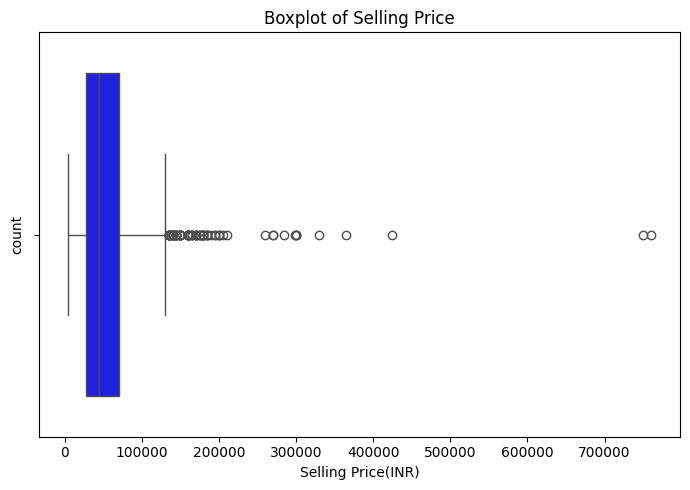

In [37]:
#create boxplot for selling price show range
plt.figure(figsize=(7, 5))
sns.boxplot(x=df['selling_price'], color='blue')
plt.title('Boxplot of Selling Price')
plt.xlabel('Selling Price(INR)')
plt.ylabel('count')
plt.tight_layout()
plt.show()

In [29]:
#Q2) What is the meadian selling price for bikes in the dataset ?
selling_price_median = df['selling_price'].median()
print("median selling price:", selling_price_median)

median selling price: 45000.0


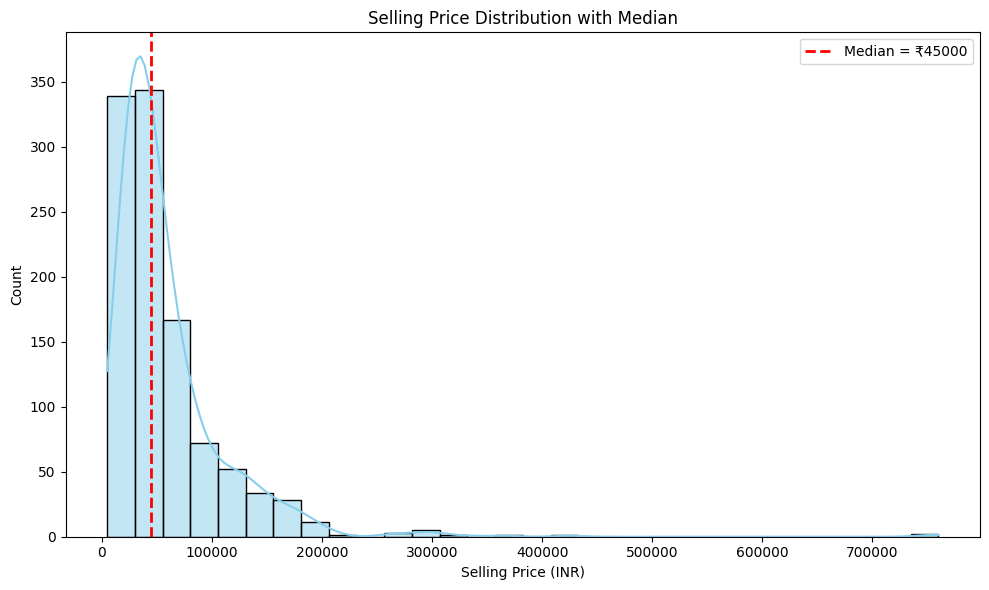

In [32]:
# Calculate median
median_price = df['selling_price'].median()

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], bins=30, kde=True, color='skyblue')

# Add median line
plt.axvline(median_price, color='red', linestyle='--', linewidth=2, label=f'Median = ₹{int(median_price)}')

# Plot details
plt.title('Selling Price Distribution with Median')
plt.xlabel('Selling Price (INR)')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

most common seller type: 1055
count: 1055


C:\Users\ANIL CHOUDHARY\AppData\Local\Temp\ipykernel_16148\2843138774.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='seller_type', palette='viridis')


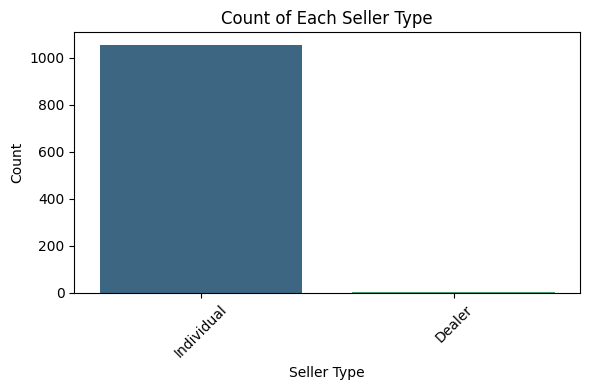

In [73]:
#Q3) What is the most common seller type ?
#find the most common seller type
most_common_seller_type = df['seller_type'].value_counts().idxmax()
most_common_seller_type = df['seller_type'].value_counts().max()
print("most common seller type:", most_common_seller_type)
print("count:", most_common_seller_type)
# Plot the count of each seller type
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='seller_type', palette='viridis')

plt.title('Count of Each Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [53]:
#Q4) how many bikes have driven more than 50000 kilometer ? 
bikes_over_50k_km = df[df['km_driven'] > 50000]
print("bikes over 50k km:", bikes_over_50k_km)
# Count the number of bikes driven more than 50000 km
count_bikes_over_50k_km = bikes_over_50k_km.shape[0]
print("Number of bikes driven more than 50000 km:", count_bikes_over_50k_km)

bikes over 50k km:                                name  selling_price  year seller_type  \
5                  Honda CB Twister          18000  2010  Individual   
15    Suzuki Access 125 [2007-2016]          25000  2012  Individual   
20             Hero Passion Pro 110          15000  2008  Individual   
31          Yamaha FZ S [2012-2016]          38000  2013  Individual   
43                Hero Passion XPro          28000  2012  Individual   
...                             ...            ...   ...         ...   
1049            Hero Super Splendor          20000  2007  Individual   
1050               Bajaj Pulsar 150          20000  2010  Individual   
1056                      Activa 3g          17000  2010  Individual   
1059                 Honda CB Shine          12000  2009  Individual   
1060               Bajaj Pulsar 150          10000  2008  Individual   

          owner  km_driven  ex_showroom_price  
5     1st owner      60000            53857.0  
15    1st owner     

Average km_driven by ownership type:
       owner      km_driven
0  1st owner   32816.583333
1  2nd owner   39288.991870
2  3rd owner   33292.181818
3  4th owner  311500.000000


C:\Users\ANIL CHOUDHARY\AppData\Local\Temp\ipykernel_16148\4139553427.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='owner', y='km_driven', data=average_km_by_ownership, palette='viridis')


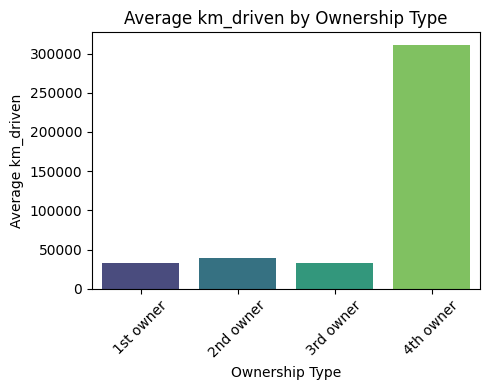

In [71]:
# Q5) What is the average km_driven value for each ownership type ?
average_km_by_ownership = df.groupby('owner')['km_driven'].mean().reset_index()
print("Average km_driven by ownership type:")
print(average_km_by_ownership)
# Plotting average km_driven by ownership type
plt.figure(figsize=(5, 4))
sns.barplot(x='owner', y='km_driven', data=average_km_by_ownership, palette='viridis')
plt.title('Average km_driven by Ownership Type')
plt.xlabel('Ownership Type')
plt.ylabel('Average km_driven')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Proportion of bikes from 2015 or older: 0.5664467483506126


C:\Users\ANIL CHOUDHARY\AppData\Local\Temp\ipykernel_16148\684006605.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='year', palette='viridis')


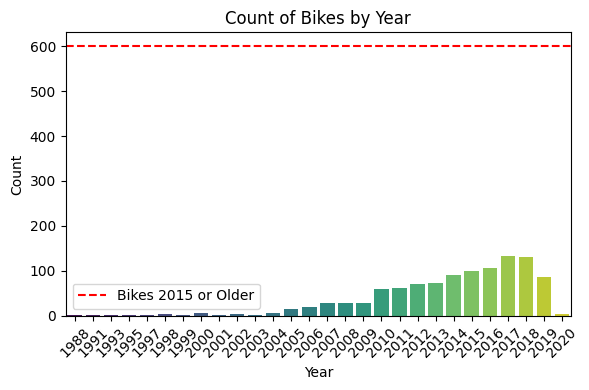

In [74]:
# Q6) What proportion bikes are from the year 2015 or older ?
bikes_2015_or_older = df[df['year'] <= 2015]
proportion_bikes_2015_or_older = bikes_2015_or_older.shape[0] / df.shape[0]
print("Proportion of bikes from 2015 or older:", proportion_bikes_2015_or_older)
#proportion mean a fraction or percentage of all the bikes in your dataset that were manufactured in the year 2015 or any year before 2015.
#  It's a way of understanding the age distribution of your bike inventory.
# Plotting the proportion of bikes from 2015 or older
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='year', palette='viridis')

plt.axhline(y=bikes_2015_or_older.shape[0], color='red', linestyle='--', label='Bikes 2015 or Older')
plt.title('Count of Bikes by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\ANIL CHOUDHARY\AppData\Local\Temp\ipykernel_16148\1863074886.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')


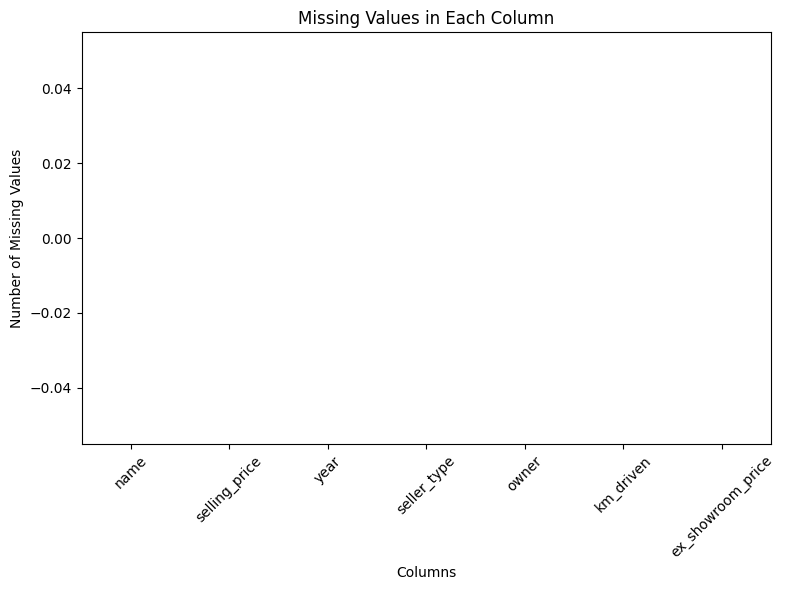

In [69]:
import seaborn as sns
# Q7) What is the trend of missing values across the dataset ?
missing_values = df.isnull().sum()
plt.figure(figsize=(8, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# showing that there is no any missing value in the dataset

Highest ex-showroom price recorded: 1278000.0
Bike with highest ex-showroom price: Harley-Davidson Street Bob


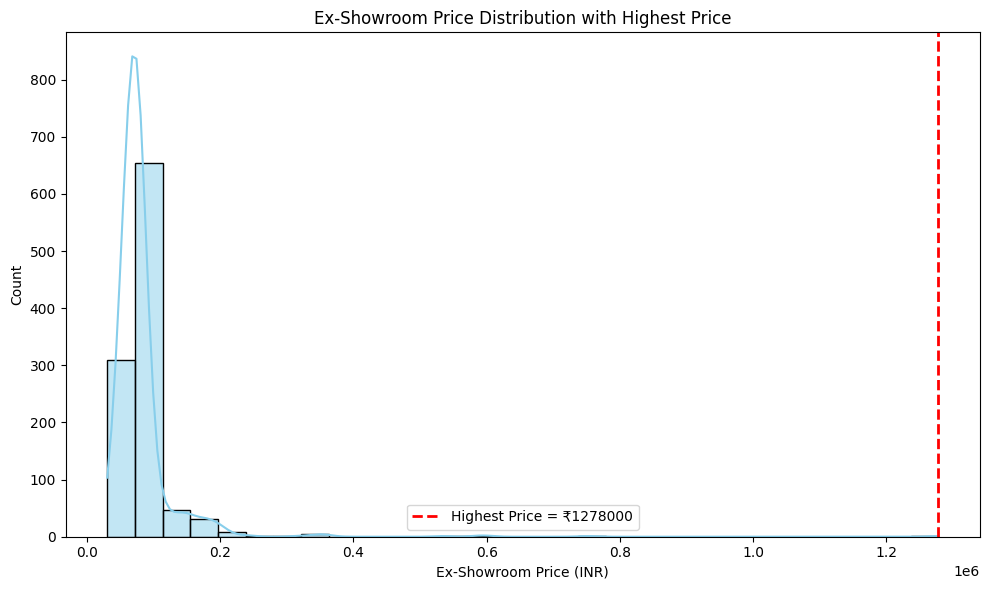

In [79]:
#Q8) What is highest ex_showroom_price recorded and for which bike ?
highest_ex_showroom_price = df['ex_showroom_price'].max()
highest_ex_showroom_bike = df[df['ex_showroom_price'] == highest_ex_showroom_price]['name'].values[0]
print("Highest ex-showroom price recorded:", highest_ex_showroom_price)
print("Bike with highest ex-showroom price:", highest_ex_showroom_bike)
# Plotting the ex-showroom price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['ex_showroom_price'], bins=30, kde=True, color='skyblue')
plt.axvline(highest_ex_showroom_price, color='red', linestyle='--', linewidth=2, label=f'Highest Price = ₹{int(highest_ex_showroom_price)}')
plt.title('Ex-Showroom Price Distribution with Highest Price')
plt.xlabel('Ex-Showroom Price (INR)')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

In [61]:
#Q9) What is the total number of bikes listed by each seller type ?
total_bikes_by_seller_type = df['seller_type'].value_counts().reset_index()
total_bikes_by_seller_type.columns = ['seller_type', 'total_bikes']
print("Total number of bikes listed by each seller type:")
print(total_bikes_by_seller_type)


Total number of bikes listed by each seller type:
  seller_type  total_bikes
0  Individual         1055
1      Dealer            6


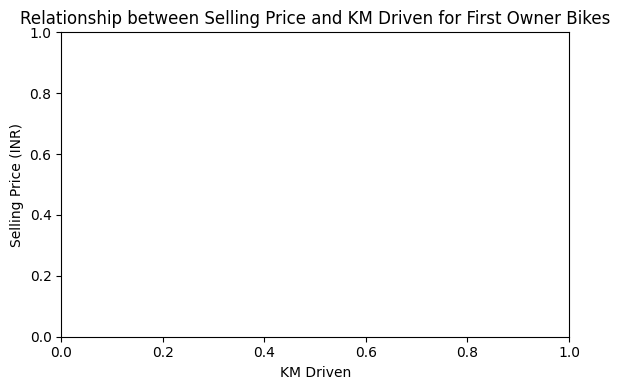

In [75]:
#Q10) What is the relationship between selling_price and km_driven for first-owner bike ?
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df[df['owner'] == 'First Owner'], x='km_driven', y='selling_price', color='purple')
plt.title('Relationship between Selling Price and KM Driven for First Owner Bikes')
plt.xlabel('KM Driven')
plt.ylabel('Selling Price (INR)')
plt.tight_layout()
plt.show()



In [76]:
#Q11) Identify and remove outliers in the km_driven column using IQR method ?
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound)]
print("Outliers in km_driven column:")
print(outliers)
# Remove outliers from the DataFrame
df_no_outliers = df[~((df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound))]
# Display the DataFrame after removing outliers
print("DataFrame after removing outliers in km_driven:")
print(df_no_outliers.head())



Outliers in km_driven column:
                                 name  selling_price  year seller_type  \
91           Honda Activa [2000-2015]          22989  2012  Individual   
93                      Suzuki GS150R          30000  2010  Individual   
115           Hero Honda Passion Plus           7500  2004  Individual   
135            Hero Honda CBZ extreme          20000  2007  Individual   
154                Hero Xtreme Sports          22000  2014  Individual   
184              Honda CB Unicorn 160          75000  2015  Individual   
363                Hero Honda CD100SS          10000  1997  Individual   
470          Honda Activa [2000-2015]          23000  2009  Individual   
474     Hero Honda Passion PRO [2012]          12000  2012  Individual   
477          Honda Activa [2000-2015]          25000  2009  Individual   
511                Hero Splendor Plus          12000  2007  Individual   
535              Hero Honda CD Deluxe          12000  2007  Individual   
548     

C:\Users\ANIL CHOUDHARY\AppData\Local\Temp\ipykernel_16148\2646658911.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='year', y='selling_price', palette='viridis')


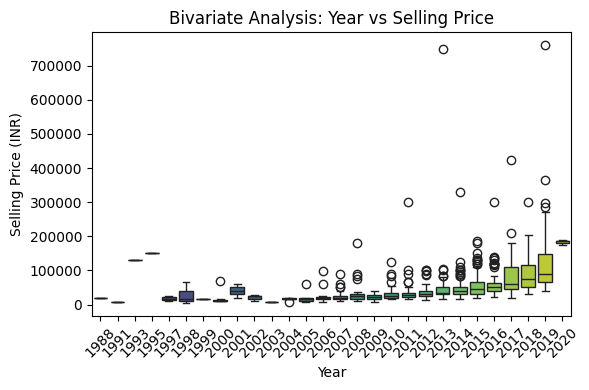

In [78]:
#Q12) Perforn a bivariate analysis to visualize the relationship between year and selling_price ?
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='year', y='selling_price', palette='viridis')
plt.title('Bivariate Analysis: Year vs Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Average depreciation in selling price based on bike age:
    bike_age  selling_price
0          5  183333.333333
1          6  119689.511628
2          7   87660.374046
3          8   78894.736842
4          9   58469.018692
5         10   56500.000000
6         11   48668.131868
7         12   51136.986301
8         13   35748.400000
9         14   35655.721311
10        15   31793.333333
11        16   22267.857143
12        17   34289.285714
13        18   24927.586207
14        19   23380.000000
15        20   16978.571429
16        21   15100.000000
17        22    8000.000000
18        23   20666.666667
19        24   40000.000000
20        25   20833.333333
21        26   15000.000000
22        27   28333.333333
23        28   17500.000000
24        30  150000.000000
25        32  130000.000000
26        34    6000.000000
27        37   20000.000000


C:\Users\ANIL CHOUDHARY\AppData\Local\Temp\ipykernel_16148\1590324531.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bike_age', y='selling_price', data=average_depreciation, palette='viridis')


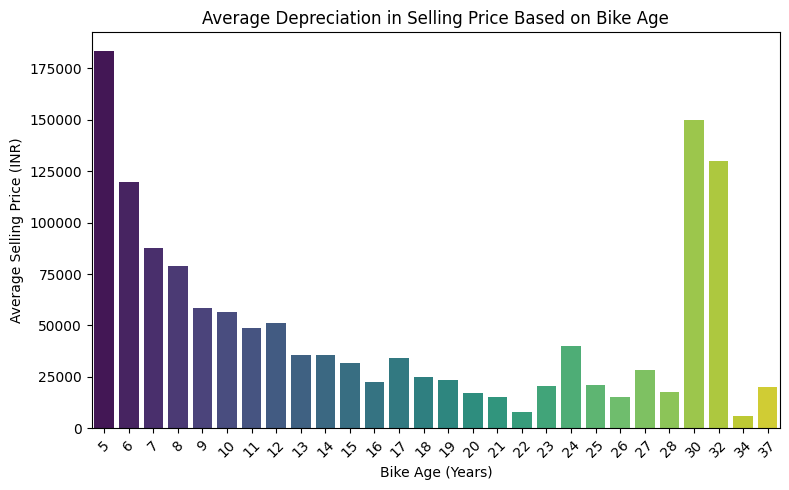

In [ ]:
#Q13) What is the average depreciation in selling price based on the bikes age (current year - manufacturing year )?
current_year = 2025
df['bike_age'] = current_year - df['year']
average_depreciation = df.groupby('bike_age')['selling_price'].mean().reset_index()
print("Average depreciation in selling price based on bike age:")
print(average_depreciation)
# Plotting average depreciation in selling price based on bike age
plt.figure(figsize=(8, 5))
sns.barplot(x='bike_age', y='selling_price', data=average_depreciation, palette='viridis')
plt.title('Average Depreciation in Selling Price Based on Bike Age')
plt.xlabel('Bike Age (Years)')
plt.ylabel('Average Selling Price (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [97]:
#Q14) Which bike names are priced significatly above the average price for their manufacturing year ?
average_price_by_year = df.groupby('year')['selling_price'].mean().reset_index()
above_average_bikes = df[df['selling_price'] > df['year'].map(average_price_by_year.set_index('year')['selling_price'])]
print("Bikes priced significantly above the average price for their manufacturing year:")
print(above_average_bikes[['name', 'year', 'selling_price']])


Bikes priced significantly above the average price for their manufacturing year:
                                      name  year  selling_price
0                Royal Enfield Classic 350  2019         175000
2      Royal Enfield Classic Gunmetal Grey  2018         150000
3        Yamaha Fazer FI V 2.0 [2016-2018]  2015          65000
7     Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                           Yamaha YZF R3  2019         365000
...                                    ...   ...            ...
1004                  Bajaj Pulsar  NS 200  2016          60000
1005                    TVS Apache RTR 160  2014          60000
1008                    Bajaj Pulsar 220 F  2012          52000
1012                   Bajaj Pulsar NS 200  2014          50000
1023                Bajaj Avenger 220 dtsi  2012          45000

[334 rows x 3 columns]


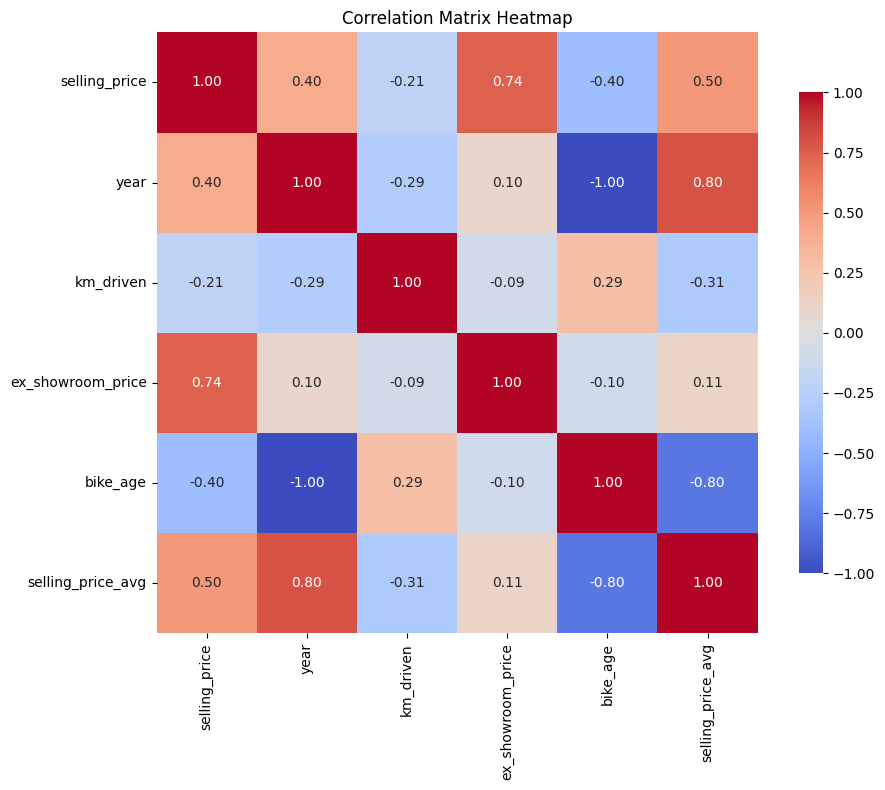

In [99]:
# Q15) Develop a correlation matrix for numeric columns and visualize it using a heatmap

# Select only numeric columns and ensure unique column names
numeric_df = df.select_dtypes(include=[np.number])
numeric_df = numeric_df.loc[:, ~numeric_df.columns.duplicated()]

correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()